In [1]:
# 필수 라이브러리
import pandas as pd
import numpy as np
import random
import tensorflow as tf

In [2]:
data = pd.read_csv('./data/wine_train.csv')
data.shape

(5497, 14)

In [3]:
data[:3]

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white


In [4]:
data['quality'].value_counts()

6    2416
5    1788
7     924
4     186
8     152
3      26
9       5
Name: quality, dtype: int64

In [5]:
data.type

0       white
1         red
2       white
3       white
4       white
        ...  
5492    white
5493    white
5494    white
5495    white
5496    white
Name: type, Length: 5497, dtype: object

In [6]:
data.type.value_counts()

white    4159
red      1338
Name: type, dtype: int64

In [7]:
from tensorflow.keras.utils import to_categorical

In [8]:
# 딥러닝 기본에서는 target이 명목형인 경우, dummy로 만들어주어야 한다. (one-hot 인코딩)

In [9]:
y_data = to_categorical(data['quality'] - 3)
y_data[:3]

array([[0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [10]:
data['type'] = np.where(data['type'] == 'white', 1, 0).astype('int')
data['type'].value_counts()

1    4159
0    1338
Name: type, dtype: int64

In [11]:
X_data = data.loc[:, 'fixed acidity':]
X_data[:3]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,1
1,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0
2,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,1


In [12]:
X_data.shape, y_data.shape

((5497, 12), (5497, 7))

In [13]:
# min-max scale

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()
X_data_scaled = scaler.fit_transform(X_data)
X_data_scaled[:3]

array([[0.14876033, 0.41      , 0.03614458, 0.09509202, 0.05490849,
        0.02777778, 0.1797235 , 0.13900135, 0.5511811 , 0.12359551,
        0.31884058, 1.        ],
       [0.41322314, 0.35333333, 0.08433735, 0.02760736, 0.09650582,
        0.03125   , 0.08294931, 0.18874108, 0.35433071, 0.20786517,
        0.2173913 , 0.        ],
       [0.33884298, 0.08666667, 0.23493976, 0.02147239, 0.07986689,
        0.06944444, 0.30414747, 0.08964719, 0.24409449, 0.16853933,
        0.42028986, 1.        ]])

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_data_scaled, y_data, 
                                                    test_size=0.2, 
                                                    shuffle=True, 
                                                    random_state=100)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4397, 12) (4397, 7)
(1100, 12) (1100, 7)


In [18]:
# 모델 생성
# 심층 신경망 모델
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [19]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=12))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(7, activation='softmax'))

In [20]:
# 이 모델로 설정을 하겠음(compile)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc', 'mae']
             )

In [21]:
# 설정 레이어 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1664      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
 dense_4 (Dense)             (None, 7)                 77        
                                                                 
Total params: 12,407
Trainable params: 12,407
Non-trainable params: 0
_________________________________________________________________


In [23]:
history = model.fit(X_train, y_train, epochs = 1000, batch_size=10, verbose=2)
history

Epoch 1/1000
440/440 - 0s - loss: 1.1270 - acc: 0.5242 - mae: 0.1713 - 342ms/epoch - 778us/step
Epoch 2/1000
440/440 - 0s - loss: 1.1118 - acc: 0.5397 - mae: 0.1698 - 333ms/epoch - 758us/step
Epoch 3/1000
440/440 - 0s - loss: 1.0996 - acc: 0.5390 - mae: 0.1688 - 331ms/epoch - 752us/step
Epoch 4/1000
440/440 - 0s - loss: 1.0884 - acc: 0.5456 - mae: 0.1675 - 320ms/epoch - 727us/step
Epoch 5/1000
440/440 - 0s - loss: 1.0815 - acc: 0.5442 - mae: 0.1667 - 332ms/epoch - 755us/step
Epoch 6/1000
440/440 - 0s - loss: 1.0773 - acc: 0.5540 - mae: 0.1662 - 318ms/epoch - 722us/step
Epoch 7/1000
440/440 - 0s - loss: 1.0709 - acc: 0.5465 - mae: 0.1659 - 316ms/epoch - 719us/step
Epoch 8/1000
440/440 - 0s - loss: 1.0658 - acc: 0.5488 - mae: 0.1657 - 334ms/epoch - 758us/step
Epoch 9/1000
440/440 - 0s - loss: 1.0559 - acc: 0.5604 - mae: 0.1645 - 334ms/epoch - 758us/step
Epoch 10/1000
440/440 - 0s - loss: 1.0465 - acc: 0.5668 - mae: 0.1642 - 318ms/epoch - 723us/step
Epoch 11/1000
440/440 - 0s - loss: 1.04

Epoch 86/1000
440/440 - 0s - loss: 0.8106 - acc: 0.6523 - mae: 0.1329 - 283ms/epoch - 644us/step
Epoch 87/1000
440/440 - 0s - loss: 0.8022 - acc: 0.6607 - mae: 0.1321 - 283ms/epoch - 644us/step
Epoch 88/1000
440/440 - 0s - loss: 0.7995 - acc: 0.6577 - mae: 0.1308 - 283ms/epoch - 643us/step
Epoch 89/1000
440/440 - 0s - loss: 0.8061 - acc: 0.6532 - mae: 0.1325 - 298ms/epoch - 678us/step
Epoch 90/1000
440/440 - 0s - loss: 0.7926 - acc: 0.6636 - mae: 0.1309 - 284ms/epoch - 646us/step
Epoch 91/1000
440/440 - 0s - loss: 0.7886 - acc: 0.6595 - mae: 0.1300 - 284ms/epoch - 645us/step
Epoch 92/1000
440/440 - 0s - loss: 0.7877 - acc: 0.6570 - mae: 0.1296 - 269ms/epoch - 610us/step
Epoch 93/1000
440/440 - 0s - loss: 0.7828 - acc: 0.6659 - mae: 0.1286 - 267ms/epoch - 607us/step
Epoch 94/1000
440/440 - 0s - loss: 0.7835 - acc: 0.6607 - mae: 0.1286 - 284ms/epoch - 645us/step
Epoch 95/1000
440/440 - 0s - loss: 0.7781 - acc: 0.6670 - mae: 0.1278 - 283ms/epoch - 643us/step
Epoch 96/1000
440/440 - 0s - l

Epoch 170/1000
440/440 - 0s - loss: 0.5009 - acc: 0.7965 - mae: 0.0837 - 267ms/epoch - 608us/step
Epoch 171/1000
440/440 - 0s - loss: 0.4974 - acc: 0.7971 - mae: 0.0837 - 281ms/epoch - 640us/step
Epoch 172/1000
440/440 - 0s - loss: 0.5121 - acc: 0.7955 - mae: 0.0838 - 269ms/epoch - 610us/step
Epoch 173/1000
440/440 - 0s - loss: 0.4964 - acc: 0.8026 - mae: 0.0825 - 251ms/epoch - 571us/step
Epoch 174/1000
440/440 - 0s - loss: 0.4965 - acc: 0.8008 - mae: 0.0823 - 266ms/epoch - 604us/step
Epoch 175/1000
440/440 - 0s - loss: 0.5039 - acc: 0.7974 - mae: 0.0833 - 282ms/epoch - 640us/step
Epoch 176/1000
440/440 - 0s - loss: 0.4900 - acc: 0.8028 - mae: 0.0811 - 268ms/epoch - 608us/step
Epoch 177/1000
440/440 - 0s - loss: 0.4878 - acc: 0.8053 - mae: 0.0813 - 267ms/epoch - 607us/step
Epoch 178/1000
440/440 - 0s - loss: 0.5034 - acc: 0.7976 - mae: 0.0823 - 267ms/epoch - 607us/step
Epoch 179/1000
440/440 - 0s - loss: 0.4771 - acc: 0.8099 - mae: 0.0803 - 250ms/epoch - 569us/step
Epoch 180/1000
440/4

Epoch 254/1000
440/440 - 0s - loss: 0.3062 - acc: 0.8829 - mae: 0.0522 - 318ms/epoch - 723us/step
Epoch 255/1000
440/440 - 0s - loss: 0.3340 - acc: 0.8697 - mae: 0.0540 - 300ms/epoch - 682us/step
Epoch 256/1000
440/440 - 0s - loss: 0.3177 - acc: 0.8749 - mae: 0.0530 - 300ms/epoch - 683us/step
Epoch 257/1000
440/440 - 0s - loss: 0.3000 - acc: 0.8824 - mae: 0.0505 - 300ms/epoch - 681us/step
Epoch 258/1000
440/440 - 0s - loss: 0.3146 - acc: 0.8792 - mae: 0.0519 - 300ms/epoch - 682us/step
Epoch 259/1000
440/440 - 0s - loss: 0.3537 - acc: 0.8633 - mae: 0.0557 - 316ms/epoch - 718us/step
Epoch 260/1000
440/440 - 0s - loss: 0.2913 - acc: 0.8881 - mae: 0.0497 - 328ms/epoch - 745us/step
Epoch 261/1000
440/440 - 0s - loss: 0.3208 - acc: 0.8738 - mae: 0.0520 - 290ms/epoch - 659us/step
Epoch 262/1000
440/440 - 0s - loss: 0.2882 - acc: 0.8913 - mae: 0.0490 - 314ms/epoch - 714us/step
Epoch 263/1000
440/440 - 0s - loss: 0.3080 - acc: 0.8779 - mae: 0.0512 - 301ms/epoch - 684us/step
Epoch 264/1000
440/4

Epoch 338/1000
440/440 - 0s - loss: 0.2150 - acc: 0.9206 - mae: 0.0350 - 267ms/epoch - 606us/step
Epoch 339/1000
440/440 - 0s - loss: 0.2165 - acc: 0.9197 - mae: 0.0351 - 266ms/epoch - 605us/step
Epoch 340/1000
440/440 - 0s - loss: 0.2445 - acc: 0.9102 - mae: 0.0386 - 282ms/epoch - 641us/step
Epoch 341/1000
440/440 - 0s - loss: 0.2108 - acc: 0.9195 - mae: 0.0346 - 299ms/epoch - 680us/step
Epoch 342/1000
440/440 - 0s - loss: 0.1868 - acc: 0.9304 - mae: 0.0321 - 270ms/epoch - 613us/step
Epoch 343/1000
440/440 - 0s - loss: 0.2286 - acc: 0.9149 - mae: 0.0355 - 282ms/epoch - 641us/step
Epoch 344/1000
440/440 - 0s - loss: 0.1955 - acc: 0.9236 - mae: 0.0337 - 284ms/epoch - 645us/step
Epoch 345/1000
440/440 - 0s - loss: 0.2139 - acc: 0.9188 - mae: 0.0352 - 299ms/epoch - 680us/step
Epoch 346/1000
440/440 - 0s - loss: 0.2454 - acc: 0.9077 - mae: 0.0383 - 268ms/epoch - 610us/step
Epoch 347/1000
440/440 - 0s - loss: 0.2213 - acc: 0.9170 - mae: 0.0355 - 267ms/epoch - 607us/step
Epoch 348/1000
440/4

Epoch 422/1000
440/440 - 0s - loss: 0.1845 - acc: 0.9340 - mae: 0.0278 - 252ms/epoch - 574us/step
Epoch 423/1000
440/440 - 0s - loss: 0.1992 - acc: 0.9345 - mae: 0.0278 - 267ms/epoch - 606us/step
Epoch 424/1000
440/440 - 0s - loss: 0.1764 - acc: 0.9322 - mae: 0.0285 - 266ms/epoch - 604us/step
Epoch 425/1000
440/440 - 0s - loss: 0.1408 - acc: 0.9484 - mae: 0.0240 - 267ms/epoch - 607us/step
Epoch 426/1000
440/440 - 0s - loss: 0.1658 - acc: 0.9413 - mae: 0.0267 - 266ms/epoch - 605us/step
Epoch 427/1000
440/440 - 0s - loss: 0.1529 - acc: 0.9477 - mae: 0.0248 - 267ms/epoch - 606us/step
Epoch 428/1000
440/440 - 0s - loss: 0.1424 - acc: 0.9481 - mae: 0.0236 - 251ms/epoch - 571us/step
Epoch 429/1000
440/440 - 0s - loss: 0.1854 - acc: 0.9340 - mae: 0.0277 - 266ms/epoch - 604us/step
Epoch 430/1000
440/440 - 0s - loss: 0.1726 - acc: 0.9379 - mae: 0.0271 - 267ms/epoch - 606us/step
Epoch 431/1000
440/440 - 0s - loss: 0.1467 - acc: 0.9472 - mae: 0.0241 - 266ms/epoch - 605us/step
Epoch 432/1000
440/4

Epoch 506/1000
440/440 - 0s - loss: 0.1545 - acc: 0.9452 - mae: 0.0240 - 283ms/epoch - 644us/step
Epoch 507/1000
440/440 - 0s - loss: 0.1169 - acc: 0.9568 - mae: 0.0200 - 283ms/epoch - 643us/step
Epoch 508/1000
440/440 - 0s - loss: 0.1439 - acc: 0.9554 - mae: 0.0204 - 283ms/epoch - 644us/step
Epoch 509/1000
440/440 - 0s - loss: 0.1841 - acc: 0.9368 - mae: 0.0253 - 284ms/epoch - 645us/step
Epoch 510/1000
440/440 - 0s - loss: 0.1039 - acc: 0.9632 - mae: 0.0182 - 283ms/epoch - 644us/step
Epoch 511/1000
440/440 - 0s - loss: 0.1006 - acc: 0.9647 - mae: 0.0176 - 283ms/epoch - 644us/step
Epoch 512/1000
440/440 - 0s - loss: 0.1983 - acc: 0.9345 - mae: 0.0253 - 283ms/epoch - 642us/step
Epoch 513/1000
440/440 - 0s - loss: 0.1813 - acc: 0.9320 - mae: 0.0263 - 284ms/epoch - 646us/step
Epoch 514/1000
440/440 - 0s - loss: 0.1287 - acc: 0.9559 - mae: 0.0209 - 283ms/epoch - 644us/step
Epoch 515/1000
440/440 - 0s - loss: 0.0809 - acc: 0.9727 - mae: 0.0148 - 283ms/epoch - 643us/step
Epoch 516/1000
440/4

Epoch 590/1000
440/440 - 0s - loss: 0.1609 - acc: 0.9402 - mae: 0.0233 - 315ms/epoch - 716us/step
Epoch 591/1000
440/440 - 0s - loss: 0.1296 - acc: 0.9536 - mae: 0.0201 - 318ms/epoch - 723us/step
Epoch 592/1000
440/440 - 0s - loss: 0.0834 - acc: 0.9748 - mae: 0.0140 - 302ms/epoch - 687us/step
Epoch 593/1000
440/440 - 0s - loss: 0.2211 - acc: 0.9313 - mae: 0.0250 - 313ms/epoch - 711us/step
Epoch 594/1000
440/440 - 0s - loss: 0.1420 - acc: 0.9506 - mae: 0.0210 - 323ms/epoch - 734us/step
Epoch 595/1000
440/440 - 0s - loss: 0.0582 - acc: 0.9834 - mae: 0.0108 - 324ms/epoch - 737us/step
Epoch 596/1000
440/440 - 0s - loss: 0.1126 - acc: 0.9577 - mae: 0.0180 - 340ms/epoch - 772us/step
Epoch 597/1000
440/440 - 0s - loss: 0.0771 - acc: 0.9754 - mae: 0.0130 - 315ms/epoch - 717us/step
Epoch 598/1000
440/440 - 0s - loss: 0.1180 - acc: 0.9620 - mae: 0.0169 - 326ms/epoch - 740us/step
Epoch 599/1000
440/440 - 0s - loss: 0.2187 - acc: 0.9311 - mae: 0.0263 - 314ms/epoch - 714us/step
Epoch 600/1000
440/4

Epoch 674/1000
440/440 - 0s - loss: 0.0766 - acc: 0.9727 - mae: 0.0132 - 284ms/epoch - 644us/step
Epoch 675/1000
440/440 - 0s - loss: 0.0630 - acc: 0.9788 - mae: 0.0111 - 271ms/epoch - 615us/step
Epoch 676/1000
440/440 - 0s - loss: 0.2001 - acc: 0.9306 - mae: 0.0246 - 259ms/epoch - 589us/step
Epoch 677/1000
440/440 - 0s - loss: 0.0844 - acc: 0.9711 - mae: 0.0144 - 315ms/epoch - 715us/step
Epoch 678/1000
440/440 - 0s - loss: 0.1310 - acc: 0.9561 - mae: 0.0189 - 254ms/epoch - 577us/step
Epoch 679/1000
440/440 - 0s - loss: 0.0454 - acc: 0.9870 - mae: 0.0090 - 266ms/epoch - 605us/step
Epoch 680/1000
440/440 - 0s - loss: 0.0528 - acc: 0.9825 - mae: 0.0099 - 281ms/epoch - 638us/step
Epoch 681/1000
440/440 - 0s - loss: 0.1156 - acc: 0.9654 - mae: 0.0159 - 270ms/epoch - 613us/step
Epoch 682/1000
440/440 - 0s - loss: 0.1679 - acc: 0.9431 - mae: 0.0222 - 266ms/epoch - 605us/step
Epoch 683/1000
440/440 - 0s - loss: 0.0948 - acc: 0.9693 - mae: 0.0155 - 267ms/epoch - 607us/step
Epoch 684/1000
440/4

Epoch 758/1000
440/440 - 0s - loss: 0.0686 - acc: 0.9741 - mae: 0.0126 - 315ms/epoch - 717us/step
Epoch 759/1000
440/440 - 0s - loss: 0.0352 - acc: 0.9914 - mae: 0.0069 - 305ms/epoch - 693us/step
Epoch 760/1000
440/440 - 0s - loss: 0.0665 - acc: 0.9829 - mae: 0.0095 - 314ms/epoch - 713us/step
Epoch 761/1000
440/440 - 0s - loss: 0.1401 - acc: 0.9545 - mae: 0.0180 - 301ms/epoch - 684us/step
Epoch 762/1000
440/440 - 0s - loss: 0.1957 - acc: 0.9370 - mae: 0.0228 - 316ms/epoch - 718us/step
Epoch 763/1000
440/440 - 0s - loss: 0.0686 - acc: 0.9748 - mae: 0.0115 - 302ms/epoch - 687us/step
Epoch 764/1000
440/440 - 0s - loss: 0.0222 - acc: 0.9950 - mae: 0.0052 - 334ms/epoch - 758us/step
Epoch 765/1000
440/440 - 0s - loss: 0.0407 - acc: 0.9877 - mae: 0.0075 - 330ms/epoch - 749us/step
Epoch 766/1000
440/440 - 0s - loss: 0.1765 - acc: 0.9381 - mae: 0.0227 - 323ms/epoch - 734us/step
Epoch 767/1000
440/440 - 0s - loss: 0.1941 - acc: 0.9361 - mae: 0.0234 - 322ms/epoch - 732us/step
Epoch 768/1000
440/4

Epoch 842/1000
440/440 - 0s - loss: 0.0874 - acc: 0.9727 - mae: 0.0126 - 296ms/epoch - 673us/step
Epoch 843/1000
440/440 - 0s - loss: 0.0339 - acc: 0.9902 - mae: 0.0067 - 278ms/epoch - 631us/step
Epoch 844/1000
440/440 - 0s - loss: 0.0168 - acc: 0.9966 - mae: 0.0037 - 273ms/epoch - 621us/step
Epoch 845/1000
440/440 - 0s - loss: 0.0478 - acc: 0.9850 - mae: 0.0080 - 281ms/epoch - 638us/step
Epoch 846/1000
440/440 - 0s - loss: 0.2129 - acc: 0.9313 - mae: 0.0234 - 269ms/epoch - 612us/step
Epoch 847/1000
440/440 - 0s - loss: 0.1281 - acc: 0.9586 - mae: 0.0164 - 282ms/epoch - 642us/step
Epoch 848/1000
440/440 - 0s - loss: 0.0567 - acc: 0.9857 - mae: 0.0085 - 251ms/epoch - 571us/step
Epoch 849/1000
440/440 - 0s - loss: 0.0189 - acc: 0.9961 - mae: 0.0043 - 251ms/epoch - 569us/step
Epoch 850/1000
440/440 - 0s - loss: 0.0261 - acc: 0.9925 - mae: 0.0053 - 279ms/epoch - 633us/step
Epoch 851/1000
440/440 - 0s - loss: 0.2770 - acc: 0.9286 - mae: 0.0249 - 252ms/epoch - 573us/step
Epoch 852/1000
440/4

Epoch 926/1000
440/440 - 0s - loss: 0.1199 - acc: 0.9566 - mae: 0.0165 - 289ms/epoch - 658us/step
Epoch 927/1000
440/440 - 0s - loss: 0.0422 - acc: 0.9848 - mae: 0.0079 - 285ms/epoch - 648us/step
Epoch 928/1000
440/440 - 0s - loss: 0.0311 - acc: 0.9925 - mae: 0.0060 - 300ms/epoch - 682us/step
Epoch 929/1000
440/440 - 0s - loss: 0.1594 - acc: 0.9527 - mae: 0.0173 - 297ms/epoch - 674us/step
Epoch 930/1000
440/440 - 0s - loss: 0.1228 - acc: 0.9650 - mae: 0.0151 - 283ms/epoch - 643us/step
Epoch 931/1000
440/440 - 0s - loss: 0.0873 - acc: 0.9716 - mae: 0.0127 - 300ms/epoch - 682us/step
Epoch 932/1000
440/440 - 0s - loss: 0.0606 - acc: 0.9795 - mae: 0.0094 - 285ms/epoch - 647us/step
Epoch 933/1000
440/440 - 0s - loss: 0.0197 - acc: 0.9955 - mae: 0.0044 - 283ms/epoch - 642us/step
Epoch 934/1000
440/440 - 0s - loss: 0.0200 - acc: 0.9961 - mae: 0.0040 - 286ms/epoch - 650us/step
Epoch 935/1000
440/440 - 0s - loss: 0.0230 - acc: 0.9932 - mae: 0.0044 - 298ms/epoch - 676us/step
Epoch 936/1000
440/4

In [25]:
# 1000 epochs를 학습시킨 후 (train_data의 학습 결과)
## loss: 0.2276 - acc: 0.9381 - mae: 0.0213 

In [26]:
# 테스트 데이터의 학습 결과를 비교해보자!!
# acc: train < test
test_result = model.evaluate(X_test, y_test)
test_result

35/35 [==============================] - 0s 904us/step - loss: 5.2735 - acc: 0.5882 - mae: 0.1195


[5.273458480834961, 0.5881817936897278, 0.11951956897974014]

In [27]:
# overfitting 되었음
# train => loss: 0.2276 - acc: 0.9381 - mae: 0.0213
# test => loss: 5.273458480834961 - acc:  0.5881817936897278 - mae: 0.11951956897974014
# loss(적을수록 좋음): train < test
# acc(클수록 좋음): train > test
# mae(적을수록 좋음): train < test

In [28]:
# 다중 분류에서는 predict를 할 때 각 항목이 될 가능성을 계산해준다.
y_pred = model.predict(X_test)
y_pred[0]

array([0.0000000e+00, 0.0000000e+00, 2.8670659e-13, 1.0971991e-02,
       9.8902160e-01, 6.0472040e-29, 6.4275246e-06], dtype=float32)

In [30]:
y_pred0_index = np.argmax(y_pred[0])
y_pred0_index + 3

7

In [33]:
y_test[0][5:] # ==> 예측 실패

array([1., 0.], dtype=float32)

In [34]:
len(y_pred)

1100

In [35]:
y_pred.shape

(1100, 7)

In [36]:
y_pred_test = np.argmax(y_pred, axis = -1) + 3
y_pred_test

array([7, 6, 5, ..., 6, 7, 9], dtype=int64)

In [38]:
y_test_ = np.argmax(y_test, axis = -1) + 3
y_test_

array([8, 5, 5, ..., 6, 7, 8], dtype=int64)

In [41]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
print(accuracy_score(y_test_, y_pred_test))
print(confusion_matrix(y_test_, y_pred_test))

0.5881818181818181
[[  0   0   0   1   0   0   0]
 [  4   9  15  10   3   0   0]
 [  2  14 221  86  21   2   0]
 [  0  11  92 294  84  12   0]
 [  0   0   7  54 115   8   1]
 [  0   1   0   6  15   8   1]
 [  0   0   0   0   3   0   0]]


## 시각화

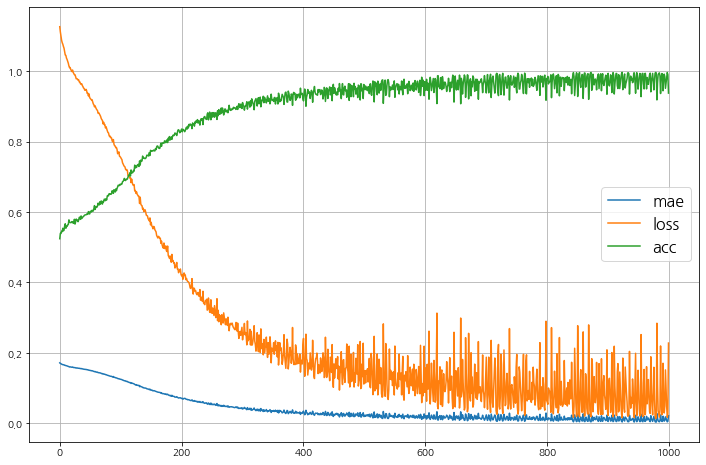

In [52]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))
plt.plot(history.history['mae'])
plt.plot(history.history['loss'])
plt.plot(history.history['acc'])
plt.legend(['mae', 'loss', 'acc'])
plt.grid()
plt.show()